In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import pystan
import matplotlib.pyplot as plt

In [2]:
#   int<lower=1> N;              //number of units in fitting data
#   int<lower=1> M;              //number of units in predict data
#   int<lower=1> D;               // data dimension
#   vector[D] x[N];                // data
#   matrix[M, D] x_tilde;          // prediction data
#   vector[N] y;                  // observed function values
lb = 0.5
ub = 2.5
def fn(x):
    y = np.sin(10 * np.pi * x) / (2 * x) + np.power(x - 1, 4.0)
    return y

N = 50
M = 10
x = np.random.uniform(low=lb, high=ub, size=N)
x.sort()
y = fn(x) + 0.01 * np.random.randn(N)
x_tilde = np.random.uniform(low=lb, high=ub, size=M)
x_tilde.sort()
dat = {"N": N, "M": M, "D": 1,
       "x": x.reshape((N, 1)),
       "x_tilde": x_tilde.reshape((M, 1)), 
       "y": y,
       "y_var": np.zeros_like(y)}

In [3]:
paramlist = ["y_tilde", "rho", "alpha", "sigma"]

fit = pystan.stan(file = "full_bayes_opt/gp_anisotropic_rbf_noiseless.stan",
                  data=dat, iter=500, pars=paramlist)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9d3b67a3d93f21689fefa47431853c5d NOW.
/Users/delkind/Desktop/full_bayes_opt/jpy/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [4]:
print(fit)

Inference for Stan model: anon_model_9d3b67a3d93f21689fefa47431853c5d.
4 chains, each with iter=500; warmup=250; thin=1; 
post-warmup draws per chain=250, total post-warmup draws=1000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
y_tilde[0]  -0.47  9.1e-3   0.28  -1.05  -0.65  -0.47  -0.29    0.1    972    1.0
y_tilde[1]   0.17  9.4e-3    0.3   -0.4  -0.02   0.17   0.37   0.76   1000    1.0
y_tilde[2]  -0.09  9.5e-3   0.29  -0.66  -0.28  -0.09   0.09   0.49    936    1.0
y_tilde[3]   0.23    0.01   0.31  -0.39   0.01   0.23   0.44   0.85    931    1.0
y_tilde[4]   0.25  8.9e-3   0.28  -0.29   0.06   0.25   0.43   0.81   1000    1.0
y_tilde[5]   0.63  9.5e-3   0.29   0.08   0.43   0.63   0.83   1.21    918    1.0
y_tilde[6]    1.0  9.8e-3    0.3   0.41   0.81   1.01    1.2   1.58    926    1.0
y_tilde[7]   2.84  8.8e-3   0.28   2.29   2.66   2.83   3.01    3.4   1000   1.01
y_tilde[8]   3.16  9.1e-3   0.29   2.61   2.97   3.15   3.34    3.7   1000  

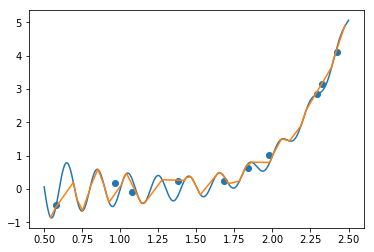

In [5]:
x_tru = np.linspace(lb, ub, 500)
y_tru = fn(x_tru)

y_pred = fit.extract("y_tilde")["y_tilde"].mean(axis=0)

plt.plot(x_tru, y_tru)
plt.plot(x, y)
plt.scatter(x_tilde, y_pred)